In [1]:
import pandas as pd
import numpy as np


import io 
import requests 
import os
import glob
#plots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import scipy.stats as stats

In [2]:
# I'll do TSC you can do fmr1
# grab csv files that we want
# make a big table for WT
# make a big table for KO, we will do individual rats if we have to later
# WT = 153,125?
# Het = 144, 145
rat_00153 = pd.read_csv('00153.csv') # get rat
rat_00153['Genotype'] = "TSC_WT" # add column with genotype
rat_00153['ID'] = "00153" # add rat number


rat_00125 = pd.read_csv('00125.csv') # get rat
rat_00125['Genotype'] = "TSC_WT" # add column with genotype
rat_00125['ID'] = "00125" # add rat number

TSC_wt_ls = pd.concat([rat_00153,rat_00125]) # append the wildtype rats together
TSC_wt_ls


,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,Genotype,ID
0,0.0,0.0,90,4000,1,1,TSC_WT,00153
1,0.0,0.0,90,4000,1,2,TSC_WT,00153
2,0.0,0.0,90,4000,1,3,TSC_WT,00153
3,0.0,0.0,90,4000,1,4,TSC_WT,00153
4,0.0,0.0,90,4000,1,5,TSC_WT,00153
...,...,...,...,...,...,...,...,...
1315,0.0,0.0,0,0,2,1,TSC_WT,00125
1316,0.0,0.0,0,0,2,2,TSC_WT,00125
1317,0.0,0.0,0,0,2,3,TSC_WT,00125
1318,0.0,0.0,0,0,2,4,TSC_WT,00125


In [3]:
# repeat for Hets
rat_00144 = pd.read_csv('00144.csv') # get rat
rat_00144['Genotype'] = "TSC_het" # add column with genotype
rat_00144['ID'] = "00144" # add rat number


rat_00145 = pd.read_csv('00145.csv') # get rat
rat_00145['Genotype'] = "TSC_het" # add column with genotype
rat_00145['ID'] = "00145" # add rat number

TSC_het_ls = pd.concat([rat_00144,rat_00145]) # append the het rats together
TSC_het_ls


,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,Genotype,ID
0,0.0,0.0,90,4000,1,1,TSC_het,00144
1,0.0,0.0,90,4000,1,2,TSC_het,00144
2,0.0,0.0,90,4000,1,3,TSC_het,00144
3,0.0,0.0,90,4000,1,4,TSC_het,00144
4,0.0,0.0,90,4000,1,5,TSC_het,00144
...,...,...,...,...,...,...,...,...
1315,0.0,0.0,0,0,2,1,TSC_het,00145
1316,0.0,0.0,0,0,2,2,TSC_het,00145
1317,0.0,0.0,0,0,2,3,TSC_het,00145
1318,0.0,0.0,0,0,2,4,TSC_het,00145


In [4]:
# remove empty rows and also make a full list for TSC
TSC_all_ls = pd.concat([TSC_wt_ls,TSC_het_ls]) # combine both dataframes


TSC_het_ls = TSC_het_ls[TSC_het_ls.Wave_amp != 0] # just in case we need the genotype arrays later
TSC_wt_ls = TSC_wt_ls[TSC_wt_ls.Wave_amp != 0]

TSC_all_ls = TSC_all_ls[TSC_all_ls.Wave_amp != 0] # removes every row where column 1 is 0
TSC_all_ls

,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,Genotype,ID
5,1.2320,1.254545,90,4000,2,1,TSC_WT,00153
6,1.1360,2.127273,90,4000,2,2,TSC_WT,00153
7,1.9200,2.600000,90,4000,2,3,TSC_WT,00153
8,0.8480,3.654545,90,4000,2,4,TSC_WT,00153
9,0.9600,4.490909,90,4000,2,5,TSC_WT,00153
...,...,...,...,...,...,...,...,...
1270,0.0864,1.872727,20,0,1,1,TSC_het,00145
1271,0.3048,2.636364,20,0,1,2,TSC_het,00145
1272,0.1824,3.400000,20,0,1,3,TSC_het,00145
1273,0.3576,4.345455,20,0,1,4,TSC_het,00145


In [32]:
# need to average wave 1 data for each rat

wave1_all = TSC_all_ls.loc[TSC_all_ls['current_wave'] == 1] # only want wave 1 data
wave1_all




,Wave_amp,Wave_lat,current_inten,current_freq,current_ear,current_wave,Genotype,ID
5,1.2320,1.254545,90,4000,2,1,TSC_WT,00153
15,0.8500,1.363636,80,4000,2,1,TSC_WT,00153
25,0.4648,1.472727,70,4000,2,1,TSC_WT,00153
35,0.2856,1.545455,60,4000,2,1,TSC_WT,00153
45,0.2464,1.763636,50,4000,2,1,TSC_WT,00153
...,...,...,...,...,...,...,...,...
1230,1.1300,1.363636,50,0,1,1,TSC_het,00145
1240,0.6496,1.472727,40,0,1,1,TSC_het,00145
1250,0.2680,1.654545,30,0,1,1,TSC_het,00145
1260,0.1764,1.836364,25,0,1,1,TSC_het,00145


Text(0.5, 1.0, 'All Wave Latency')

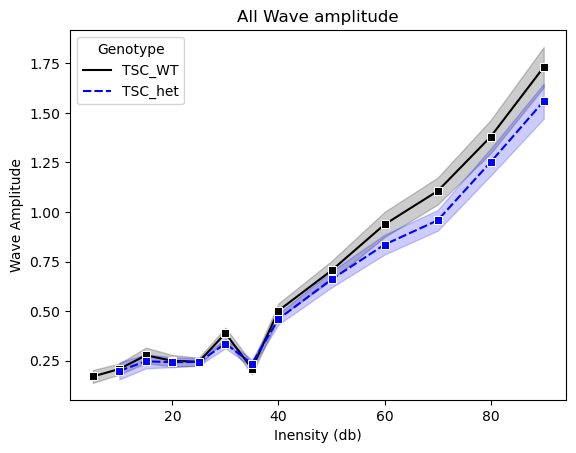

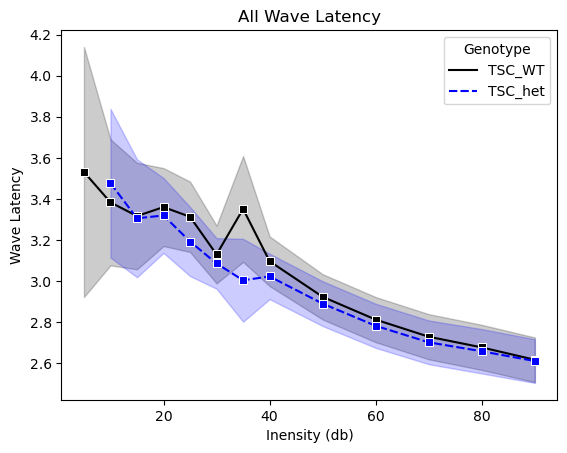

In [53]:
# graph avg wave amplitude
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=TSC_all_ls, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude')
plt.xlabel('Inensity (db)')
plt.title('All Wave amplitude')

# graph avg latency
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=TSC_all_ls, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency')
plt.xlabel('Inensity (db)')
plt.title('All Wave Latency')


Text(0.5, 1.0, 'Wave 1 Latency')

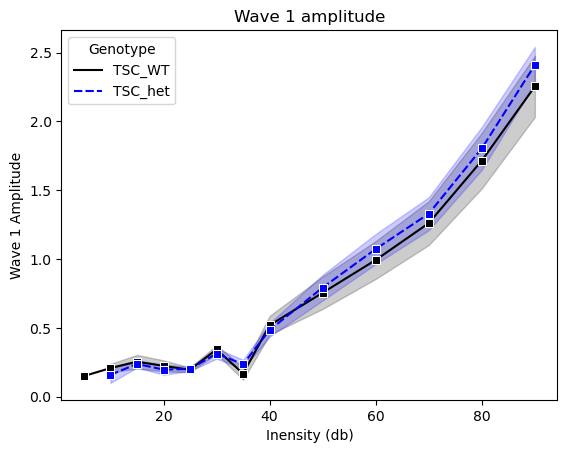

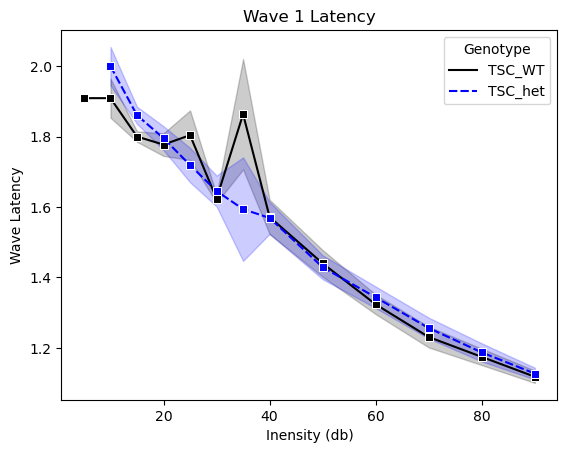

In [52]:
# graph wave 1 amplitude
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave 1 Amplitude')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 amplitude')

# graph wave 1 latency
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 Latency')


In [46]:
# get wave 4 data
wave4_all = TSC_all_ls.loc[TSC_all_ls['current_wave'] == 4] # only want wave 4 data

Text(0.5, 1.0, 'Wave 4 Latency')

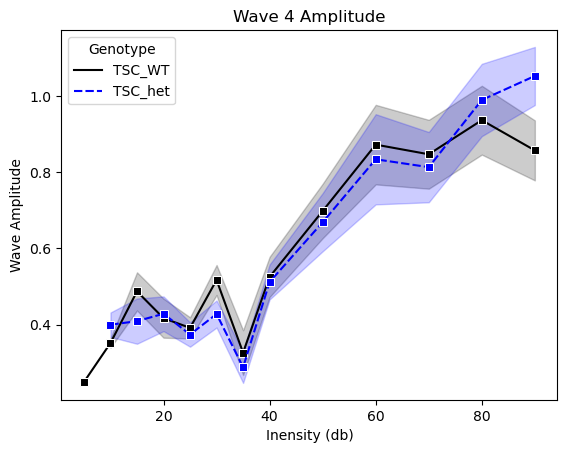

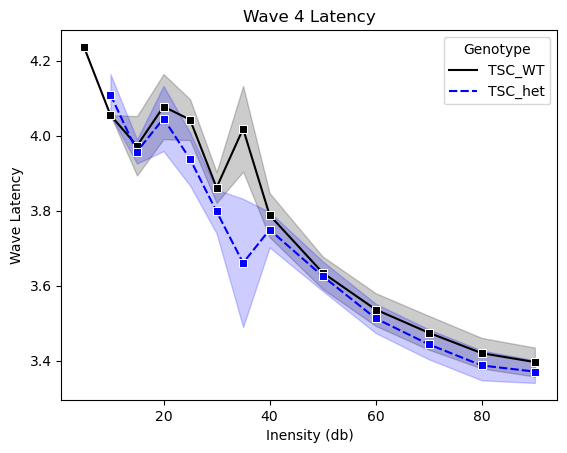

In [49]:
# graph avg wave 4
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all, x="current_inten", y="Wave_amp",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 Amplitude')

# graph avg wave 4
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all, x="current_inten", y="Wave_lat",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 Latency')

Text(0.5, 1.0, 'Wave 1 Latency')

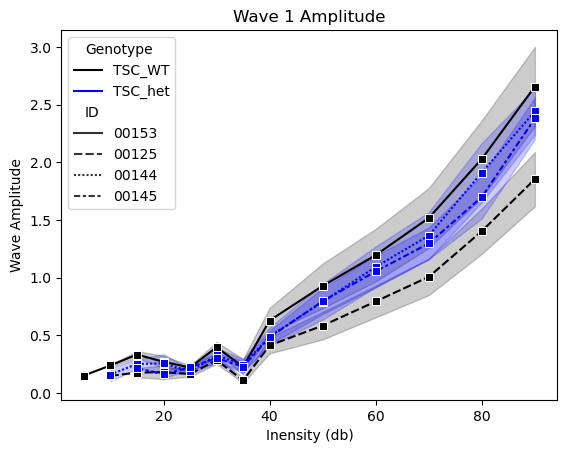

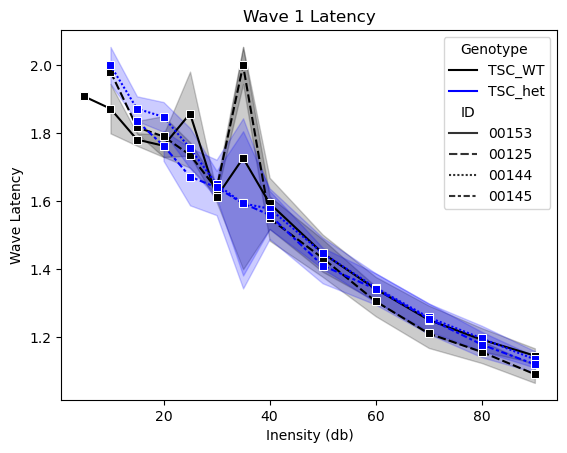

In [57]:
# plot individual data wave 1
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all, x="current_inten", y="Wave_amp",hue = "Genotype",style='ID',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 Amplitude')

fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave1_all, x="current_inten", y="Wave_lat",hue = "Genotype",style='ID',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency')
plt.xlabel('Inensity (db)')
plt.title('Wave 1 Latency')


Text(0.5, 1.0, 'Wave 4 Latency')

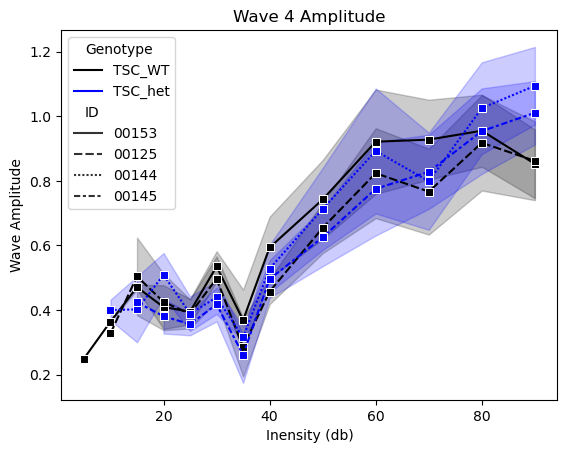

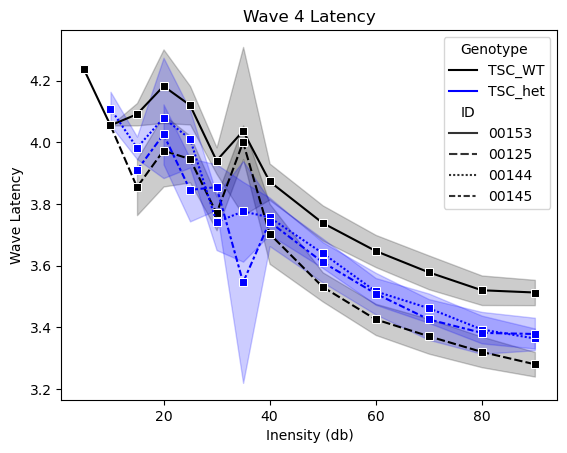

In [58]:
# plot individual data wave 4
fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all, x="current_inten", y="Wave_amp",hue = "Genotype",style='ID',errorbar=('se'),marker='s')
plt.ylabel('Wave Amplitude')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 Amplitude')

fig1,ax1 = plt.subplots()
colors = ["#000000","#0000FF"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=wave4_all, x="current_inten", y="Wave_lat",hue = "Genotype",style='ID',errorbar=('se'),marker='s')
plt.ylabel('Wave Latency')
plt.xlabel('Inensity (db)')
plt.title('Wave 4 Latency')


In [15]:
# grab csv files that we want
# make a big table for WT
# make a big table for KO, we will do individual rats if we have to later


# fmr1_WT = ???
# fmr1_KO = ???
fmr1_df = pd.read_csv('Fmr1 Rxn averages by individals.csv') # loading in the file from the folder we are in


fmr1_df


MatlabOpaque([(b'J', b'MCOS', b'table', array([[3707764736],
                     [         2],
                     [         1],
                     [         1],
                     [         1],
                     [         1]], dtype=uint32))          ],
             dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])